# EDA (Exploratory Data Analysis)

In [10]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
# Baca dataset
dataset = pd.read_csv("/content/Gabung_Dataset.csv")

# Cetak jumlah baris dan kolom
print("Jumlah baris dan kolom:", dataset.shape)

# Cetak tipe data masing-masing kolom
print("\nTipe data masing-masing kolom:")
print(dataset.dtypes)

# Cetak info dataset
print("\nInfo dataset:")
print(dataset.info())


Jumlah baris dan kolom: (648, 4202)

Tipe data masing-masing kolom:
0                float64
1                float64
2                float64
3                float64
4                float64
                  ...   
4197             float64
4198             float64
4199             float64
Mean_NBP_Sys     float64
Mean_NBP_Dias    float64
Length: 4202, dtype: object

Info dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 648 entries, 0 to 647
Columns: 4202 entries, 0 to Mean_NBP_Dias
dtypes: float64(4202)
memory usage: 20.8 MB
None


In [3]:
# Cetak statistik deskriptif
print("\nStatistik Deskriptif:")
print(dataset.describe())



Statistik Deskriptif:
                0           1           2           3           4           5  \
count  648.000000  648.000000  648.000000  648.000000  648.000000  648.000000   
mean     1.031910    1.028811    1.026817    1.026128    1.027141    1.028914   
std      0.765526    0.760217    0.755395    0.751033    0.747919    0.746743   
min      0.164223    0.161290    0.159335    0.157380    0.155425    0.153470   
25%      0.396078    0.403922    0.403922    0.391984    0.403922    0.403922   
50%      0.637295    0.629469    0.631373    0.633333    0.631373    0.631373   
75%      1.529814    1.626588    1.667644    1.650049    1.595308    1.610948   
max      2.900293    2.920821    2.928641    2.923754    2.908113    2.882698   

                6           7           8           9  ...        4192  \
count  648.000000  648.000000  648.000000  648.000000  ...  648.000000   
mean     1.031775    1.035014    1.038635    1.042019  ...    0.993811   
std      0.747539    0.75

In [5]:
# Hitung jumlah nilai yang hilang untuk setiap kolom
missing_values = dataset.isnull().sum()
print("\nJumlah nilai yang hilang untuk setiap kolom:")
print(missing_values)



Jumlah nilai yang hilang untuk setiap kolom:
0                0
1                0
2                0
3                0
4                0
                ..
4197             0
4198             0
4199             0
Mean_NBP_Sys     0
Mean_NBP_Dias    0
Length: 4202, dtype: int64


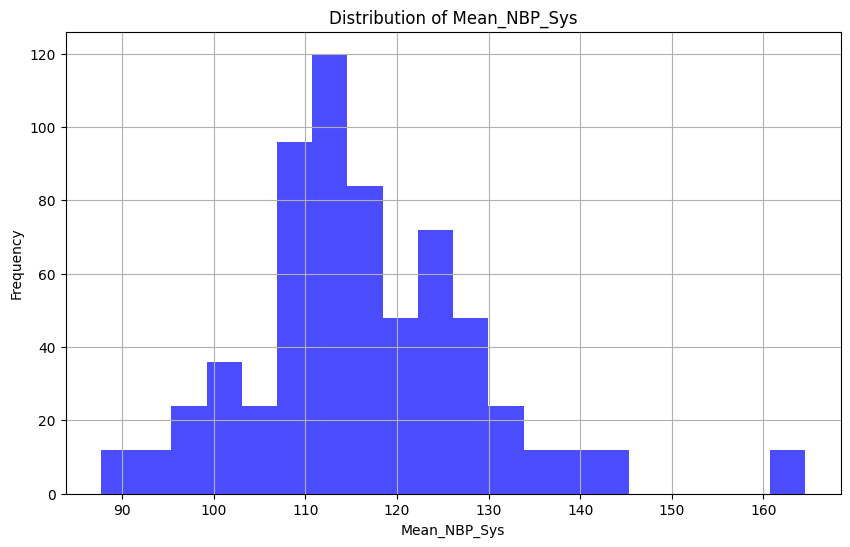

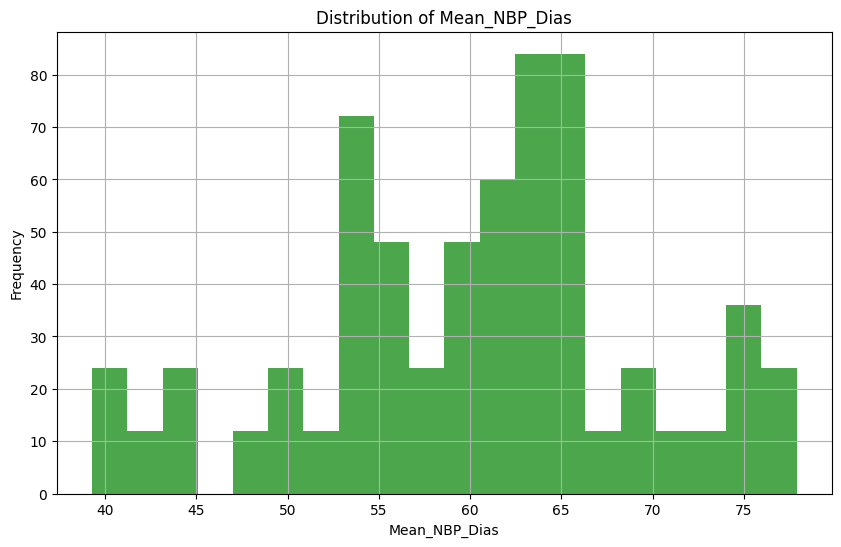

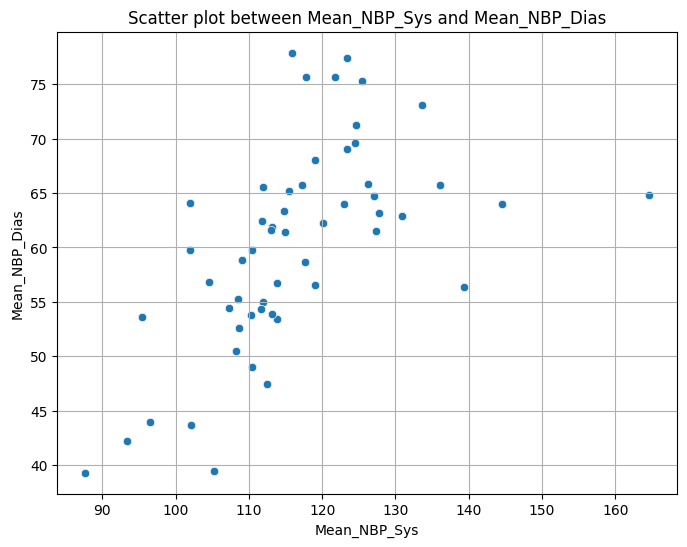

In [11]:
# Visualisasi kolom Mean_NBP_Sys
plt.figure(figsize=(10, 6))
plt.hist(dataset['Mean_NBP_Sys'], bins=20, color='blue', alpha=0.7)
plt.title('Distribution of Mean_NBP_Sys')
plt.xlabel('Mean_NBP_Sys')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Visualisasi kolom Mean_NBP_Dias
plt.figure(figsize=(10, 6))
plt.hist(dataset['Mean_NBP_Dias'], bins=20, color='green', alpha=0.7)
plt.title('Distribution of Mean_NBP_Dias')
plt.xlabel('Mean_NBP_Dias')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Langkah 5: Exploring Relationships
import seaborn as sns

# Korelasi antara Mean_NBP_Sys dan Mean_NBP_Dias
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Mean_NBP_Sys', y='Mean_NBP_Dias', data=dataset)
plt.title('Scatter plot between Mean_NBP_Sys and Mean_NBP_Dias')
plt.xlabel('Mean_NBP_Sys')
plt.ylabel('Mean_NBP_Dias')
plt.grid(True)
plt.show()

In [13]:
# Simpan dataset yang telah diolah
dataset.to_csv("/content/sample_data/Gabung_Dataset_processed.csv", index=False)

print("Dataset berhasil disimpan di: /content/sample_data/Gabung_Dataset_processed.csv")

Dataset berhasil disimpan di: /content/sample_data/Gabung_Dataset_processed.csv


# Machine Learning Random Forest

In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Langkah 1: Memuat dataset
dataset = pd.read_csv("/content/sample_data/Gabung_Dataset_processed.csv")

# Menampilkan informasi tentang dataset
print("Informasi dataset:")
print(dataset.info())

# Menampilkan beberapa baris pertama dari dataset
print("\nBeberapa baris pertama dari dataset:")
print(dataset.head())

Informasi dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 648 entries, 0 to 647
Columns: 4202 entries, 0 to Mean_NBP_Dias
dtypes: float64(4202)
memory usage: 20.8 MB
None

Beberapa baris pertama dari dataset:
          0         1         2         3         4         5         6  \
0  0.294118  0.290196  0.290196  0.290196  0.290196  0.286275  0.286275   
1  0.635294  0.631373  0.627451  0.623529  0.615686  0.607843  0.600000   
2  0.388235  0.376471  0.364706  0.364706  0.372549  0.388235  0.407843   
3  1.529814  1.515152  1.497556  1.478006  1.461388  1.449658  1.448680   
4  1.985337  2.063539  2.131965  2.188661  2.232649  2.260020  2.275660   

          7         8         9  ...      4192      4193      4194      4195  \
0  0.282353  0.282353  0.282353  ...  0.505882  0.505882  0.501961  0.498039   
1  0.592157  0.580392  0.568627  ...  0.568627  0.560784  0.552941  0.545098   
2  0.431373  0.454902  0.474510  ...  0.631373  0.611765  0.596078  0.588235   
3  1.4604

In [36]:
# Langkah 2: Pisahkan fitur (X) dan target (y)
X = dataset.drop(columns=['Mean_NBP_Sys', 'Mean_NBP_Dias'])  # Fitur input, hilangkan kolom target
y_sys = dataset['Mean_NBP_Sys']  # Target untuk Mean_NBP_Sys
y_dias = dataset['Mean_NBP_Dias']  # Target untuk Mean_NBP_Dias

print("Jumlah baris dan kolom pada dataset X:", X.shape)
print("Jumlah baris pada dataset y_sys:", y_sys.shape[0])
print("Jumlah baris pada dataset y_dias:", y_dias.shape[0])

Jumlah baris dan kolom pada dataset X: (648, 4200)
Jumlah baris pada dataset y_sys: 648
Jumlah baris pada dataset y_dias: 648


In [37]:
# Langkah 3: Menghapus baris yang mengandung nilai NaN
dataset.dropna(inplace=True)
X = dataset.drop(columns=['Mean_NBP_Sys', 'Mean_NBP_Dias'])
y_sys = dataset['Mean_NBP_Sys']
y_dias = dataset['Mean_NBP_Dias']

# Print informasi hasil Langkah 3
print("Jumlah baris dan kolom pada dataset setelah menghapus nilai NaN:", dataset.shape)

Jumlah baris dan kolom pada dataset setelah menghapus nilai NaN: (636, 4202)


In [38]:
# Langkah 4: Bagi dataset menjadi data latih dan data uji
X_train, X_test, y_train_sys, y_test_sys, y_train_dias, y_test_dias = train_test_split(X, y_sys, y_dias, test_size=0.2, random_state=42)

# Print hasil output Langkah 4
print("Jumlah baris dan kolom pada X_train:", X_train.shape)
print("Jumlah baris dan kolom pada X_test:", X_test.shape)
print("Jumlah baris pada y_train_sys:", y_train_sys.shape[0])
print("Jumlah baris pada y_test_sys:", y_test_sys.shape[0])
print("Jumlah baris pada y_train_dias:", y_train_dias.shape[0])
print("Jumlah baris pada y_test_dias:", y_test_dias.shape[0])

Jumlah baris dan kolom pada X_train: (508, 4200)
Jumlah baris dan kolom pada X_test: (128, 4200)
Jumlah baris pada y_train_sys: 508
Jumlah baris pada y_test_sys: 128
Jumlah baris pada y_train_dias: 508
Jumlah baris pada y_test_dias: 128


In [28]:
# Langkah 5: Inisialisasi dan latih model Linear Regression untuk Mean_NBP_Sys
model_sys = LinearRegression()
model_sys.fit(X_train, y_train_sys)

LinearRegression()

In [40]:
# Langkah 6: Prediksi pada data uji untuk Mean_NBP_Sys
y_pred_sys = model_sys.predict(X_test)
# Print output Langkah 6
print("\nPrediksi pada data uji untuk Mean_NBP_Sys :")
print(y_pred_sys)


Prediksi pada data uji untuk Mean_NBP_Sys :
[108.66666667  87.66666667 115.84483603 123.         123.35555556
 109.         111.7977761  125.38107362 136.09090909 108.55757576
 127.3113949   95.45960307 123.35555556 111.86565436 117.80952381
  93.42329921 115.84483603 111.7977761  110.30147059 136.09090909
 125.38107362 107.26315789 113.84210177 107.26315789 111.98628856
 104.50582033 110.375      127.3113949   87.66666667 108.27272727
 111.98628856 114.72706306 101.96668599 111.62809917 110.39803983
 115.84483603 113.1180486  113.77777778 111.98628856 114.72706306
  95.45960307 130.85798319 117.65300775 117.65300775 113.1180486
 119.04347826 120.08333333 119.04347826 127.3113949  110.375
 113.1180486  112.98664122 123.39001001 121.72003817 124.4368932
  96.57246987 113.11764706 113.84210177 119.04626464 115.42980431
 109.         102.13297916 102.13297916 139.34981962 117.80952381
  87.66666667 126.25609756 102.          96.57246987  93.42329921
 123.39001001 114.72706306 105.2947370


Evaluasi Model Mean_NBP_Sys:
Mean Squared Error (Mean_NBP_Sys): 6.2780706281109e-26
R^2 Score (Mean_NBP_Sys): 1.0


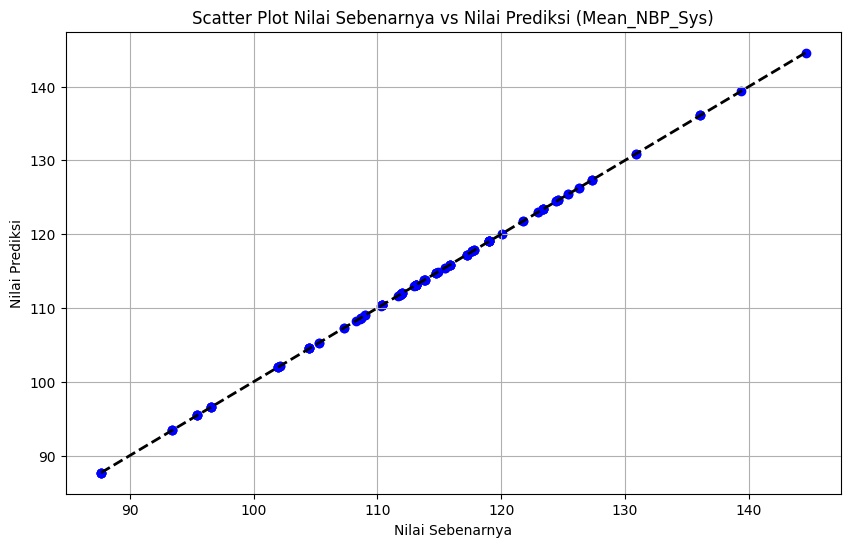

In [41]:
import matplotlib.pyplot as plt
import numpy as np

# Evaluasi kinerja model Mean_NBP_Sys
mse_sys = mean_squared_error(y_test_sys, y_pred_sys)
r2_sys = r2_score(y_test_sys, y_pred_sys)
print("\nEvaluasi Model Mean_NBP_Sys:")
print("Mean Squared Error (Mean_NBP_Sys):", mse_sys)
print("R^2 Score (Mean_NBP_Sys):", r2_sys)

# Menampilkan scatter plot nilai sebenarnya vs nilai prediksi untuk Mean_NBP_Sys
plt.figure(figsize=(10, 6))
plt.scatter(y_test_sys, y_pred_sys, color='blue')
plt.plot([y_test_sys.min(), y_test_sys.max()], [y_test_sys.min(), y_test_sys.max()], 'k--', lw=2)
plt.xlabel('Nilai Sebenarnya')
plt.ylabel('Nilai Prediksi')
plt.title('Scatter Plot Nilai Sebenarnya vs Nilai Prediksi (Mean_NBP_Sys)')
plt.grid(True)
plt.show()


In [42]:
# Langkah 7: Inisialisasi dan latih model Linear Regression untuk Mean_NBP_Dias
model_dias = LinearRegression()
model_dias.fit(X_train, y_train_dias)

# Langkah 8: Prediksi pada data uji untuk Mean_NBP_Dias
y_pred_dias = model_dias.predict(X_test)
print("\nOutput Langkah 8:")
print(y_pred_dias)



Output Langkah 8:
[52.58333333 39.29166667 77.89940075 64.         77.44444444 58.8
 62.46509396 75.26806773 65.72727273 55.25454545 61.55456174 53.60354951
 77.44444444 54.94868761 75.66666667 42.21070956 77.89940075 62.46509396
 53.77941176 65.72727273 75.26806773 54.42105263 53.4585163  54.42105263
 65.56322773 56.81765575 59.74310662 61.55456174 39.29166667 50.45454545
 65.56322773 63.31831198 59.80261339 54.32231405 48.978981   77.89940075
 53.90940941 56.75       65.56322773 63.31831198 53.60354951 62.91433824
 58.66443664 58.66443664 53.90940941 56.56521739 62.25       56.56521739
 61.55456174 59.74310662 53.90940941 61.62977099 69.06087087 75.69026718
 69.58252427 44.         61.88235294 53.4585163  68.03207378 65.16826377
 58.8        43.66712587 43.66712587 56.40129789 75.66666667 39.29166667
 65.79268293 64.09722222 44.         42.21070956 69.06087087 63.31831198
 39.42650425 61.88235294 56.81765575 65.74960081 56.81765575 59.74310662
 64.         53.4585163  65.74960081 61


Evaluasi Model Mean_NBP_Dias:
Mean Squared Error (Mean_NBP_Dias): 3.6062776282178555e-27
R^2 Score (Mean_NBP_Dias): 1.0


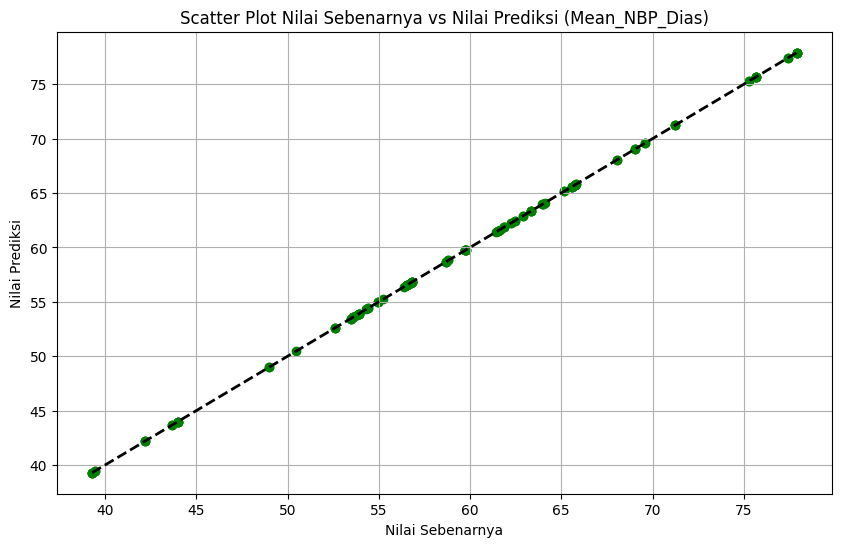

In [43]:
# Evaluasi kinerja model Mean_NBP_Dias
mse_dias = mean_squared_error(y_test_dias, y_pred_dias)
r2_dias = r2_score(y_test_dias, y_pred_dias)
print("\nEvaluasi Model Mean_NBP_Dias:")
print("Mean Squared Error (Mean_NBP_Dias):", mse_dias)
print("R^2 Score (Mean_NBP_Dias):", r2_dias)

# Menampilkan scatter plot nilai sebenarnya vs nilai prediksi untuk Mean_NBP_Dias
plt.figure(figsize=(10, 6))
plt.scatter(y_test_dias, y_pred_dias, color='green')
plt.plot([y_test_dias.min(), y_test_dias.max()], [y_test_dias.min(), y_test_dias.max()], 'k--', lw=2)
plt.xlabel('Nilai Sebenarnya')
plt.ylabel('Nilai Prediksi')
plt.title('Scatter Plot Nilai Sebenarnya vs Nilai Prediksi (Mean_NBP_Dias)')
plt.grid(True)
plt.show()


Mean Squared Error (MSE)

Nilai MSE model Mean_NBP_Dias adalah **3.6062776282178555e-27**.
Nilai MSE yang rendah menunjukkan bahwa model memprediksi nilai yang sangat dekat dengan nilai aktual.
Dalam hal ini, nilai MSE yang sangat kecil **(3.6062776282178555e-27)** menunjukkan bahwa model Mean_NBP_Dias sangat akurat dalam memprediksi nilai NBP Dias.
R^2 Score

Nilai R^2 Score model Mean_NBP_Dias adalah 1.0.
Nilai R^2 Score yang tinggi menunjukkan bahwa model mampu menjelaskan sebagian besar variasi data.
Nilai R^2 Score 1.0 menunjukkan bahwa model Mean_NBP_Dias mampu menjelaskan 100% variasi data NBP Dias.

# Kesimpulan
Berdasarkan nilai MSE yang sangat kecil dan nilai R^2 Score 1.0, serta scatter plot yang menunjukkan hubungan yang erat antara nilai NBP Dias yang sebenarnya dan nilai NBP Dias yang diprediksi, dapat disimpulkan bahwa model Mean_NBP_Dias adalah model yang sangat akurat dan mampu menjelaskan sebagian besar variasi data NBP Dias.